In [3]:
# Import Tensorflow

import tensorflow as tf
import tensorflow_hub as hub

print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

#Check for GPU availablity
# Do we have access to a GPU?
device_list = tf.config.list_physical_devices()
if "GPU" in [device.device_type for device in device_list]:
  print(f"[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!")
  print(f"[INFO] Accessible devices:\n{device_list}")
else:
  print(f"[INFO] TensorFlow does not have GPU available to use. Models may take a while to train.")
  print(f"[INFO] Accessible devices:\n{device_list}")

TF Version: 2.10.0
TF Hub Version: 0.8.0
[INFO] TensorFlow has GPU available to use. Woohoo!! Computing will be speed up!
[INFO] Accessible devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import tensorflow as tf 
print(f'TF version: {tf.version}')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) 
tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus: # Extract the GPU indices from the device names 
    gpu_indices = [int(gpu.name.split(':')[-1]) for gpu in gpus] 
    print("GPU Indices:", gpu_indices) 
else: 
    print("No GPUs available in your system.")

TF version: <module 'tensorflow._api.v2.version' from 'c:\\Users\\Tejas\\anaconda3\\envs\\ML_3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
Num GPUs Available:  1
GPU Indices: [0]


In [5]:
#Import Pandas

import pandas as pd
labels_csv = pd.read_csv("labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
len(labels_csv)

10222

<Axes: xlabel='breed'>

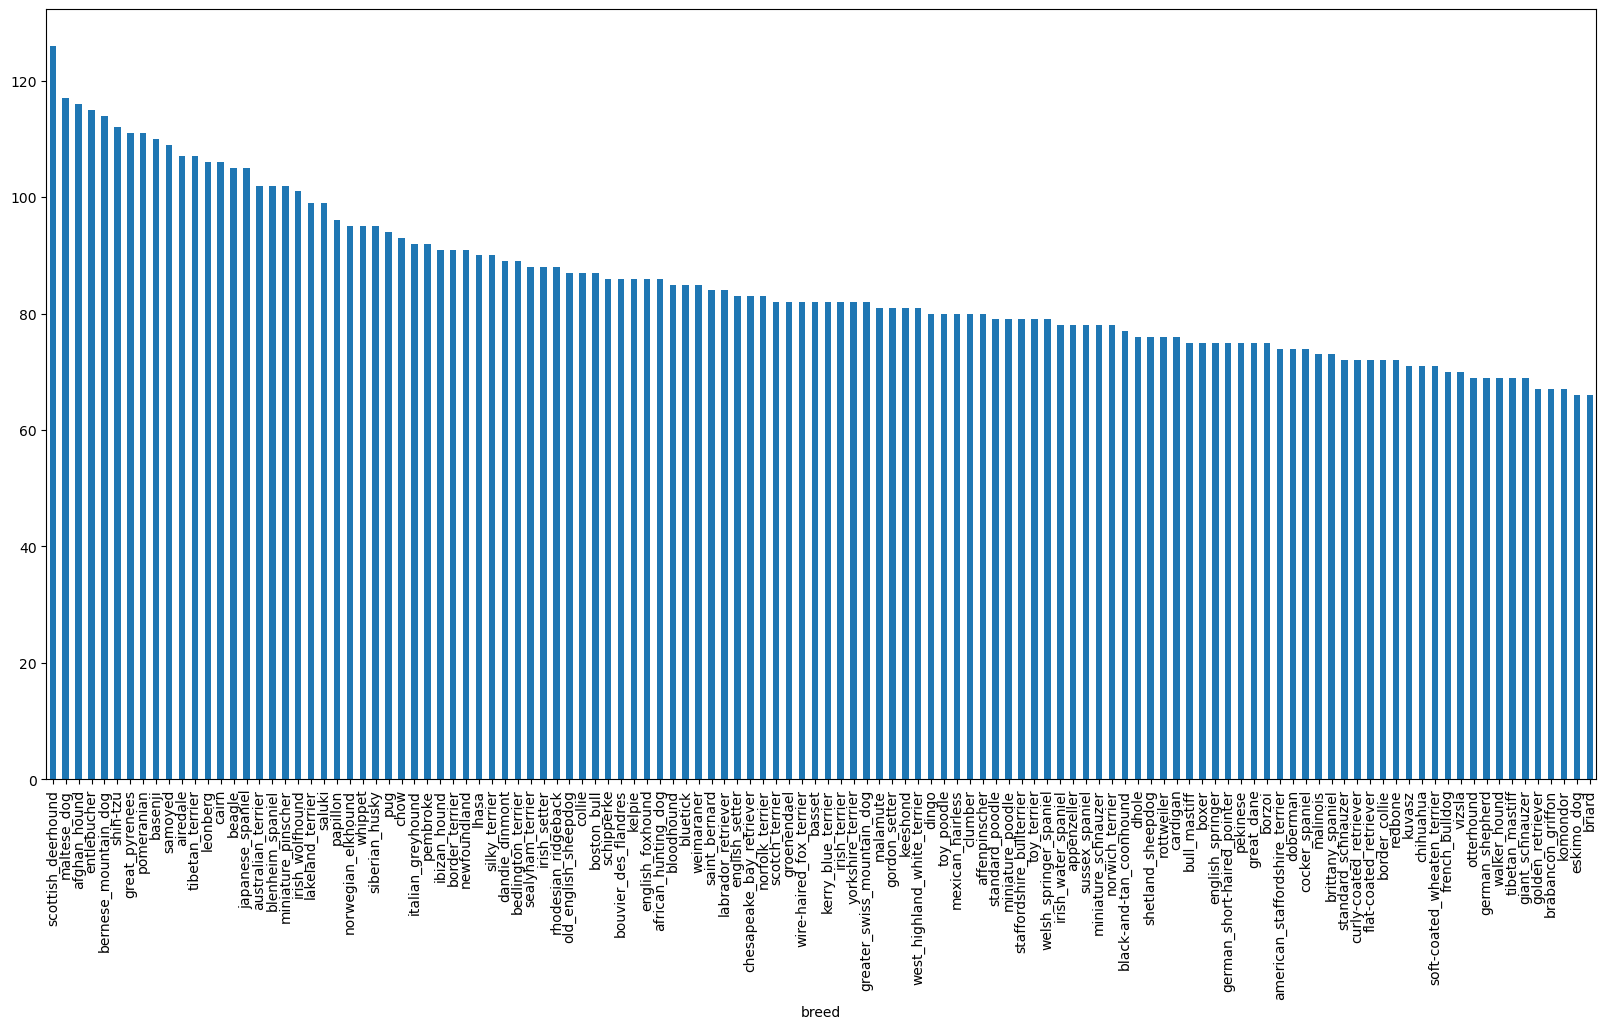

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [8]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

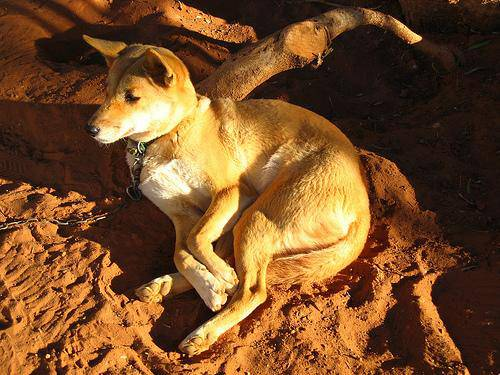

In [9]:
from IPython.display import Image
Image("train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

In [10]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
filenames = ["train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first  10
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#Check no. of filenaems matches no. of actual image files
import os

if len(os.listdir("train/")) == len(filenames):
    print("File names macth actual Qty of files!!! Proceed")
else:
    print("Filenames Do not Match to Actual Qty of Files")


File names macth actual Qty of files!!! Proceed


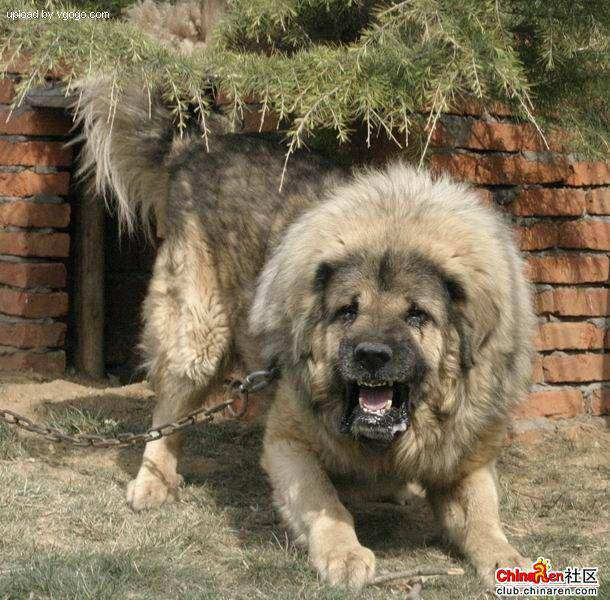

In [13]:
# Check Data format
Image(filenames[9000])

In [14]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [15]:
import numpy as np 

#convert names into np array's
labels = labels_csv["breed"].to_numpy()
labels = np.array(labels) #does the same thing

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [16]:
len(labels)

10222

In [17]:
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("No. of Labels does not macth number of filenames")


Number of labels matches number of filenames!


In [18]:
unique_breeds = np.unique(labels)
print("No. of Breeds:",len(unique_breeds))

No. of Breeds: 120


In [19]:
# Turn a single label into an aray of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels = np.array(boolean_labels).astype(int)

In [21]:
len(boolean_labels)

10222

In [22]:
boolean_labels[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Creating our own validation set

In [23]:
# Setup X and y Variables
X = filenames
y = boolean_labels

# Try to minimize time while training a model, so work with less data at first


In [24]:
NUM_IMAGES = 1000

In [26]:
# Split data into two different sets

from sklearn.model_selection import train_test_split

#Split the data

X_Train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

# Check the shape of data
len(X_Train), len(X_val), len(y_train), len(y_val)


(800, 200, 800, 200)

In [28]:
# Lets have a wuick look at data of training

X_Train[:2], y_train[:2]

(['train/00bee065dcec471f26394855c5c2f3de.jpg',
  'train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

## PreProcessing Images (truning images into tensors)

steps:

1. Take a image from filepath as input.
2. Use Tensorflow to read and save image to variable.
3. Turn image into tensors.
4. Resize image to be a shape of (224,224).
5. Return the modified image.

In [29]:
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [33]:
tf.constant(image)[:2]

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

### Now we have seen ehat image looks like in a tensor, lets make a function to preprocess them

1. Take an image filepath as input
2. Use tensorflow to read the file and save it to a variable
3. Turn our image into ten set_matplotlib_formats
4. Resize Image to 224,224
5. Return the modified image

In [41]:
# Define image size
IMG_SIZE = 224

# Create a function for pre processing images
def process_image(image_path):
    """
    Takes an image file path and turn the image into a tensor 
    """

    #Read in an image file
    image = tf.io.read_file(image_path)

    #Turn jpeg image into numerical tensor with 3 channels color RGB
    image = tf.image.decode_jpeg(image, channels=3)

    #convert the color channel values from 0 -255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)

    #Resize the image to our desired value (224,224)
    image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

    return image

## Turning our data into batches

Why turn in batches?

All images might not fit into memory so all data cannot go in one go, 
thats why we do about 32 images at a time.

In order to use Tensorflow effectively, we need our data in the from of tensor tuples which look like this : (images, labels)

In [42]:
# create a simple function to retrun a tuple (image, tuple)

def get_image_label(image_path, label):
    """Takes an image file path name and the associated label,
        processes the image and retrun a tuple of (image, label)
    """
    image = process_image(image_path)
    return image,label

#Demo of above
(process_image(X[42]),tf.constant(y[42]))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadFile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DecodeJpeg in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ResizeBilinear in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Squeeze in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048